# Fields

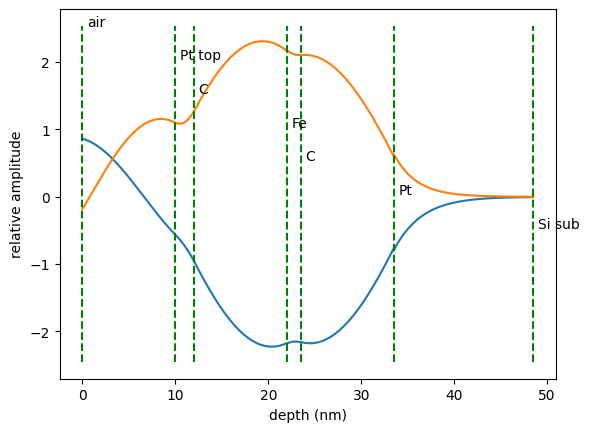

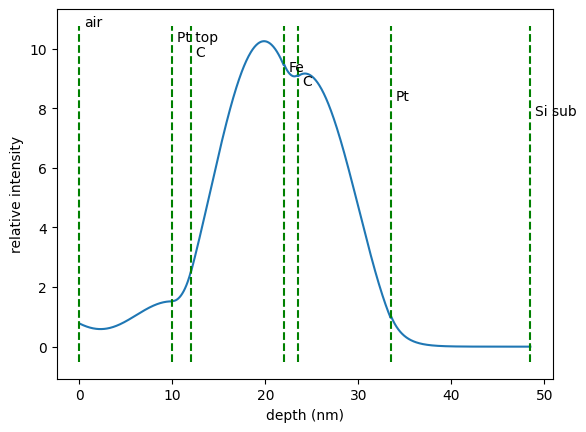

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt


# --------------------- air --------------
lay_air = nx.Layer(id = "air",
                material = nx.Material.Template(nx.lib.material.air),
                thickness = 10,
                roughness = 0
                )

# ------------------------- Fe layer --------------------------
lay_Fe = nx.Layer(id = "Fe",
                  material = nx.Material.Template(nx.lib.material.Fe_enriched),
                  thickness = 1.5,
                  roughness = 0.35
                  )

# ----------------------------- Pt layers -----------------------------
lay_Pt_top = nx.Layer(id = "Pt top",
                material = nx.Material.Template(nx.lib.material.Pt),
                thickness = 2,
                roughness = 0.2
                )

lay_Pt = nx.Layer(id = "Pt",
                material = nx.Material.Template(nx.lib.material.Pt),
                thickness = 15,
                roughness = 0.77
                )

# -------------------------- C layer ---------------------------
lay_C = nx.Layer(id = "C",
                material = nx.Material.Template(nx.lib.material.C),
                thickness = 10,
                roughness = 0.3
                )

# --------------------- substrate ---------------------------------
lay_substrate = nx.Layer(id = "Si sub",
                material = nx.Material.Template(nx.lib.material.Si),
                thickness = nx.inf,
                roughness = 0.4
                )

# --------------------- sample ---------------------------------
sample = nx.Sample(id = "simple layers",
                   layers = [lay_air,
                             lay_Pt_top,
                             lay_C,
                             lay_Fe,
                             lay_C,
                             lay_Pt,
                             lay_substrate],
                    geometry = "r",
                    angle = 0.161,
                    length = 10,
                    roughness = "a")

beam  = nx.Beam(fwhm = 0)

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.moessbauer.Fe57,
                    id = "my exp")

field_amps = nx.FieldAmplitude(sample = sample,
                               energy = nx.moessbauer.Fe57.energy,
                               points = 1001)

depth, amp = field_amps.Calculate()

plt.plot(depth, np.real(amp))
plt.plot(depth, np.imag(amp))

axes = plt.gca()
y_min, y_max = axes.get_ylim()
plt.vlines(sample.Interfaces(), y_min, y_max, colors='g', linestyles='dashed')
for id, location in zip(sample.Ids(), np.array(sample.Interfaces()) + 0.5):
    plt.text(location, y_max, id, fontsize = 10)
    y_max = y_max - 0.5

plt.xlabel('depth (nm)')
plt.ylabel('relative amplitude')
plt.show()

field_int = nx.FieldIntensity(sample = sample,
                              energy = nx.moessbauer.Fe57.energy,
                              points = 1001)

depth, int = field_int()


plt.plot(depth, int)

axes = plt.gca()
y_min, y_max = axes.get_ylim()
plt.vlines(sample.Interfaces(), y_min, y_max, colors='g', linestyles='dashed')
for id, location in zip(sample.Ids(), np.array(sample.Interfaces()) + 0.5):
    plt.text(location, y_max, id, fontsize = 10)
    y_max = y_max - 0.5

plt.xlabel('depth (nm)')
plt.ylabel('relative intensity')
plt.show()

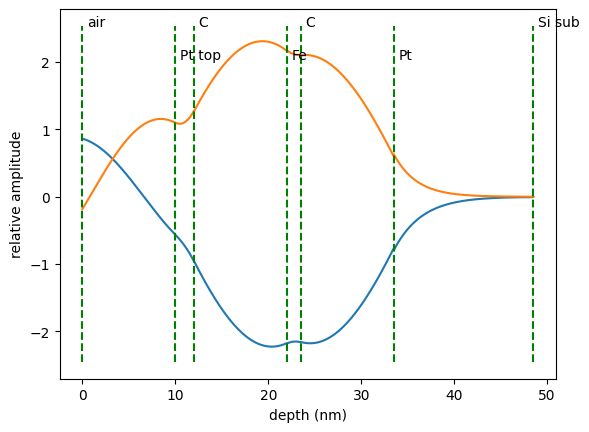

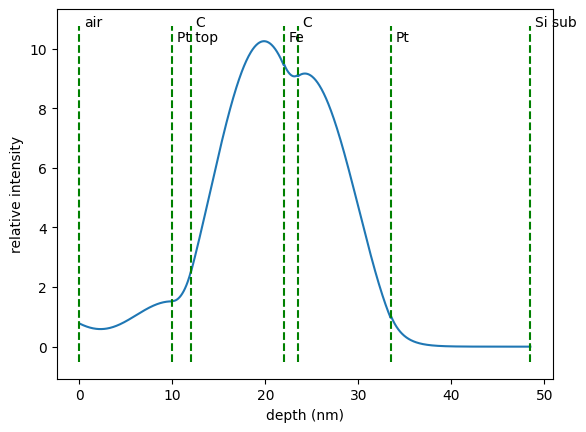

In [2]:
field_amps.Plot()

field_int.Plot()